In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# remove normal samples

In [3]:
meta = pd.read_csv('meta_data_all.csv', index_col=(0))
meta = meta[meta['cancer_type'] != 'Normal']
meta = meta[meta['source'] != 'Normal']
meta

,cancer_type,technology,n_cells,patient,source,Celltype_malignancy,Age,Gender,Stage,Treatment,...,chemo_ICI_response,ET_Regimen,subsqnt_rx,subsqnt_rx_modality,subsqnt_rx_regimen,subsqnt_rx_response,malignancy,procedure,viral,type
sample,,,,,,,,,,,,,,,,,,,,,
CLL1-post-d120,Chronic Lymphocytic Leukemia,10x,21,CLL1,Tumor,Immune cells,58.0,Female,Primary,Ibrutinib,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLL1-pre,Chronic Lymphocytic Leukemia,10x,2328,CLL1,Tumor,Immune cells,58.0,Female,Primary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLL5-post-d150,Chronic Lymphocytic Leukemia,10x,3451,CLL5,Tumor,Immune cells,60.0,Female,Primary,Ibrutinib,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLL5-post-d30,Chronic Lymphocytic Leukemia,10x,6534,CLL5,Tumor,Immune cells,60.0,Female,Primary,Ibrutinib,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLL5-pre,Chronic Lymphocytic Leukemia,10x,5426,CLL5,Tumor,Immune cells,60.0,Female,Primary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t3_PBMC,Clear Cell Renal Cell Carcinoma,10x,9621,t3,PBMC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PBMC
t4_Center,Clear Cell Renal Cell Carcinoma,10x,1739,t4,Center,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tumor
t4_Lateral,Clear Cell Renal Cell Carcinoma,10x,3866,t4,Lateral,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tumor


In [2]:
# # Filter data based on mitochondrial content and number of RNA

In [5]:
folder_path = './scrnaseq_data'

info_list = []
for folder in os.listdir(folder_path):
    for file in os.listdir(os.path.join(folder_path, folder)):
        if file == 'data_info.csv':
            df = pd.read_csv(os.path.join(folder_path, folder, file), index_col=0)
            info_list.append(df)

In [6]:
info = pd.concat(info_list, axis=0)
info.index = info.index.astype(str)
info = info[
    (info['nFeature_RNA'].between(200, 6000)) & 
    (info['percent.mt'] < 15)
].sort_index()
info = info[~info.index.duplicated(keep='first')]
info

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
0,SeuratProject,2248.0,856,2.268683
10,SeuratProject,15047.0,2732,3.847943
10000,SeuratProject,11008.0,2012,3.197674
10001,SeuratProject,1946.0,646,2.620761
10002,SeuratProject,3129.0,1025,2.396932
...,...,...,...,...
scrSOL004_TTTGTCAGTTCGCGAC,scrSOL004,10296.0,3040,0.000000
scrSOL004_TTTGTCATCACGAAGG,scrSOL004,6758.0,2519,0.000000
scrSOL004_TTTGTCATCCAACCAA,scrSOL004,8383.0,2441,0.000000
scrSOL004_TTTGTCATCCGAACGC,scrSOL004,10187.0,3087,0.000000


In [3]:
# extract metadata of cells

In [7]:
cells = pd.read_csv('cells_data.csv', index_col=(0), low_memory=False)
cells = cells[cells['file'] != 'Data_Griffiths2021_Breast']
cells.index = cells.index.astype(str)
cells = cells[cells.index.isin(info.index)].sort_index()
cells = cells[~cells.index.duplicated(keep='first')]
cells['study'] = cells['file'].str.split('_').str[1]
cells

,sample,file,file2,study
cell_name,,,,
0,RU653,Data_Laughney2020_Lung,Lung,Laughney2020
10,RU653,Data_Laughney2020_Lung,Lung,Laughney2020
10000,RU653,Data_Laughney2020_Lung,Lung,Laughney2020
10001,RU653,Data_Laughney2020_Lung,Lung,Laughney2020
10002,RU653,Data_Laughney2020_Lung,Lung,Laughney2020
...,...,...,...,...
scrSOL004_TTTGTCAGTTCGCGAC,14,Data_Qian2020_Ovarian,Ovarian,Qian2020
scrSOL004_TTTGTCATCACGAAGG,14,Data_Qian2020_Ovarian,Ovarian,Qian2020
scrSOL004_TTTGTCATCCAACCAA,14,Data_Qian2020_Ovarian,Ovarian,Qian2020


In [11]:
pd.DataFrame(cells['file'].unique()).to_csv('train_data_details.csv', index=False)

In [7]:
len(cells['sample'].unique())

922

In [8]:
len(cells['study'].unique())

51

In [4]:
# Load and merge hallmark specific scores for each single cells

In [12]:
folder_path = './scrnaseq_data'

df_list = []
for folder in os.listdir(folder_path):
    for file in os.listdir(os.path.join(folder_path, folder)):
        if file == 'score_hallmark_surv.csv':
            df = pd.read_csv(os.path.join(folder_path, folder, file), index_col=0)
            df_list.append(df)

In [13]:
scores = pd.concat(df_list, axis=0)
scores.index = scores.index.astype(str)
scores = scores[scores.index.isin(info.index)].sort_index()
scores = scores[~scores.index.duplicated(keep='first')]
scores

,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell
0,0.000000,0.031512,0.057874,0.100243,0.069404,0.000000,0.099235,0.083549,0.075874,0.105590
10,0.092805,0.210786,0.039488,0.134427,0.128474,0.067972,0.106583,0.092995,0.095696,0.150028
10000,0.121667,0.191655,0.054081,0.155639,0.178263,0.043083,0.150031,0.124682,0.188400,0.158430
10001,0.058713,0.085714,0.038870,0.096338,0.031175,0.067333,0.076906,0.087083,0.034363,0.094845
10002,0.046759,0.076952,0.068498,0.121668,0.076684,0.030278,0.097554,0.107547,0.145822,0.124309
...,...,...,...,...,...,...,...,...,...,...
scrSOL004_TTTGTCAGTTCGCGAC,0.064034,0.000000,0.083246,0.106364,0.035184,0.037583,0.079643,0.082372,0.162726,0.091213
scrSOL004_TTTGTCATCACGAAGG,0.047701,0.028869,0.072747,0.107449,0.041614,0.074153,0.085715,0.093344,0.064993,0.094363
scrSOL004_TTTGTCATCCAACCAA,0.000000,0.000000,0.046519,0.094488,0.000000,0.032542,0.073060,0.065654,0.130207,0.092781
scrSOL004_TTTGTCATCCGAACGC,0.059046,0.057274,0.060807,0.121739,0.070658,0.079792,0.106760,0.091625,0.143267,0.147191


In [9]:
scores1 = pd.concat([scores, cells, info], axis=1)
scores1

,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell,sample,file,file2,study,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
0,0.000000,0.031512,0.057874,0.100243,0.069404,0.000000,0.099235,0.083549,0.075874,0.105590,RU653,Data_Laughney2020_Lung,Lung,Laughney2020,SeuratProject,2248.0,856,2.268683
10,0.092805,0.210786,0.039488,0.134427,0.128474,0.067972,0.106583,0.092995,0.095696,0.150028,RU653,Data_Laughney2020_Lung,Lung,Laughney2020,SeuratProject,15047.0,2732,3.847943
10000,0.121667,0.191655,0.054081,0.155639,0.178263,0.043083,0.150031,0.124682,0.188400,0.158430,RU653,Data_Laughney2020_Lung,Lung,Laughney2020,SeuratProject,11008.0,2012,3.197674
10001,0.058713,0.085714,0.038870,0.096338,0.031175,0.067333,0.076906,0.087083,0.034363,0.094845,RU653,Data_Laughney2020_Lung,Lung,Laughney2020,SeuratProject,1946.0,646,2.620761
10002,0.046759,0.076952,0.068498,0.121668,0.076684,0.030278,0.097554,0.107547,0.145822,0.124309,RU653,Data_Laughney2020_Lung,Lung,Laughney2020,SeuratProject,3129.0,1025,2.396932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrSOL004_TTTGTCAGTTCGCGAC,0.064034,0.000000,0.083246,0.106364,0.035184,0.037583,0.079643,0.082372,0.162726,0.091213,14,Data_Qian2020_Ovarian,Ovarian,Qian2020,scrSOL004,10296.0,3040,0.000000
scrSOL004_TTTGTCATCACGAAGG,0.047701,0.028869,0.072747,0.107449,0.041614,0.074153,0.085715,0.093344,0.064993,0.094363,14,Data_Qian2020_Ovarian,Ovarian,Qian2020,scrSOL004,6758.0,2519,0.000000
scrSOL004_TTTGTCATCCAACCAA,0.000000,0.000000,0.046519,0.094488,0.000000,0.032542,0.073060,0.065654,0.130207,0.092781,14,Data_Qian2020_Ovarian,Ovarian,Qian2020,scrSOL004,8383.0,2441,0.000000
scrSOL004_TTTGTCATCCGAACGC,0.059046,0.057274,0.060807,0.121739,0.070658,0.079792,0.106760,0.091625,0.143267,0.147191,14,Data_Qian2020_Ovarian,Ovarian,Qian2020,scrSOL004,10187.0,3087,0.000000


In [13]:
# Benchmarking Thresolding Algorithms

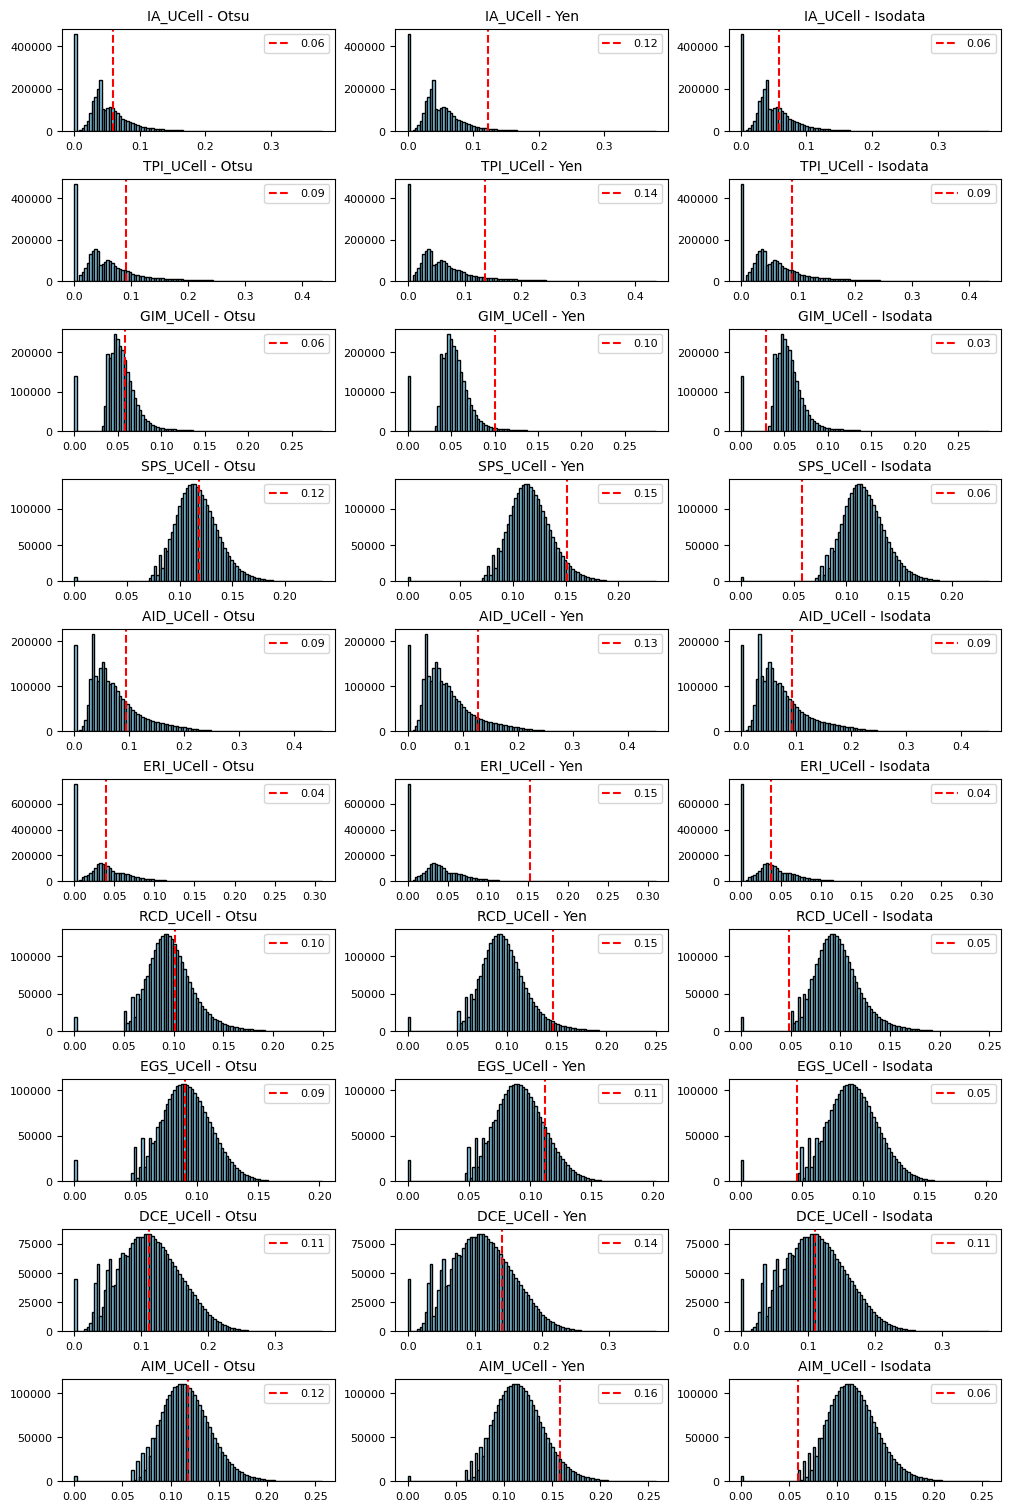

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.filters import threshold_otsu, threshold_yen, threshold_isodata

# Define your thresholding methods
threshold_methods = {
    'Otsu': threshold_otsu,
    'Yen': threshold_yen,
    'Isodata': threshold_isodata
}

# Define your columns
u_cell_columns = [
    'IA_UCell', 'TPI_UCell', 'GIM_UCell', 'SPS_UCell', 'AID_UCell',
    'ERI_UCell', 'RCD_UCell', 'EGS_UCell', 'DCE_UCell', 'AIM_UCell'
]

# Create a 10 (rows) × 3 (columns) subplot
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 15), constrained_layout=True)

for row_idx, hallmark in enumerate(u_cell_columns):
    data = scores1[hallmark].dropna().to_numpy()
    data_sorted = np.sort(data)
    for col_idx, (method_name, method_func) in enumerate(threshold_methods.items()):
        ax = axes[row_idx, col_idx]
        try:
            thresh = method_func(data_sorted)
        except ValueError:
            thresh = np.median(data_sorted)

        ax.hist(data_sorted, bins=100, color='skyblue', edgecolor='black')
        ax.axvline(thresh, color='red', linestyle='--', label=f'{thresh:.2f}')
        ax.set_title(f'{hallmark} - {method_name}', fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
        ax.legend(fontsize=8)

# Save and show the plot
plt.savefig('UCell_Thresholding_Benchmarking.png', bbox_inches='tight', dpi=1200)
plt.show()

In [5]:
# Apply otsu thresolding to categorize continuous hallmark scores

In [18]:
from skimage.filters import threshold_otsu

def otsu_thresholding(df, score_columns=scores.columns):
    thresholds = []

    for name, group in df.groupby('file2'):
        threshold_row = {'file2': name}
        
        for score_column in score_columns:
            
            # Otsu thresholding
            sorted_array = np.sort(group[score_column].values)
            midpoint = len(sorted_array) // 2
            bottom_threshold_otsu = threshold_otsu(sorted_array[:midpoint])
            top_threshold_otsu = threshold_otsu(sorted_array[midpoint:])
            
            # Store Otsu thresholds with appropriate labels
            threshold_row[f'{score_column}_Low_Threshold_Otsu'] = bottom_threshold_otsu
            threshold_row[f'{score_column}_High_Threshold_Otsu'] = top_threshold_otsu

        # Append row for each group in 'file2'
        thresholds.append(threshold_row)
    
    # Convert to DataFrame with the thresholds
    threshold_df = pd.DataFrame(thresholds).set_index('file2')
    
    # Reformat DataFrame with MultiIndex columns
    reformatted_df = threshold_df.copy()
    new_columns = pd.MultiIndex.from_tuples(
        [(col.split('_UCell_')[0] + '_UCell', col.split('_Threshold')[0].split('_')[-1]) for col in reformatted_df.columns],
        names=["Category", "Threshold"]
    )
    reformatted_df.columns = new_columns
    
    return reformatted_df

In [19]:
from sklearn.cluster import KMeans

percentiles = otsu_thresholding(scores1)
percentiles

Category        IA_UCell           TPI_UCell           GIM_UCell            \
Threshold            Low      High       Low      High       Low      High   
file2                                                                        
Brain           0.022709  0.110660  0.018762  0.141722  0.000094  0.074696   
Breast          0.015628  0.082216  0.016692  0.137808  0.000096  0.074260   
Colorectal      0.016599  0.098375  0.015217  0.133093  0.000102  0.078729   
Head and Neck   0.016863  0.088241  0.023748  0.121968  0.000108  0.083245   
Hematologic     0.015265  0.072660  0.018290  0.108492  0.000114  0.093839   
Kidney          0.015689  0.084207  0.019685  0.142363  0.000098  0.078528   
Liver-Biliary   0.013080  0.067364  0.018996  0.116496  0.000099  0.071332   
Lung            0.016926  0.097300  0.022290  0.141209  0.000104  0.092478   
Neuroendocrine  0.014479  0.074076  0.000037  0.082654  0.000105  0.080500   
Ovarian         0.021622  0.114675  0.017703  0.116667  0.000102  0.074894   
Pancreas        0.024807  0.116819  0.017152  0.151353  0.000092  0.069449   
Prostate        0.017675  0.082546  0.009562  0.108367  0.000093  0.074965   
Sarcoma         0.024313  0.085986  0.012133  0.116997  0.000106  0.079959   
Skin            0.018336  0.091862  0.019778  0.120328  0.000105  0.086643   

Category       SPS_UCell           AID_UCell           ERI_UCell            \
Threshold            Low      High       Low      High       Low      High   
file2                                                                        
Brain           0.100018  0.141624  0.039451  0.133715  0.015660  0.087080   
Breast          0.095495  0.135040  0.020402  0.124538  0.010463  0.057716   
Colorectal      0.094982  0.138223  0.019575  0.124754  0.011833  0.058569   
Head and Neck   0.107401  0.136841  0.049144  0.135050  0.013510  0.064886   
Hematologic     0.101122  0.131894  0.034547  0.123638  0.013696  0.068521   
Kidney          0.096642  0.139932  0.024035  0.135504  0.012115  0.063330   
Liver-Biliary   0.000213  0.130581  0.021467  0.119691  0.000036  0.054326   
Lung            0.101276  0.142696  0.038749  0.131988  0.013420  0.065079   
Neuroendocrine  0.087628  0.121557  0.015126  0.100249  0.018952  0.086030   
Ovarian         0.104030  0.138996  0.037287  0.115954  0.013064  0.067684   
Pancreas        0.000230  0.148255  0.028810  0.164032  0.011136  0.067671   
Prostate        0.090418  0.127548  0.017782  0.096004  0.008260  0.053744   
Sarcoma         0.102541  0.129823  0.030264  0.108169  0.009611  0.051632   
Skin            0.099821  0.137551  0.036815  0.128345  0.017467  0.085159   

Category       RCD_UCell           EGS_UCell           DCE_UCell            \
Threshold            Low      High       Low      High       Low      High   
file2                                                                        
Brain           0.081885  0.129207  0.077477  0.117021  0.067206  0.169414   
Breast          0.000177  0.116895  0.064973  0.110270  0.065082  0.151320   
Colorectal      0.071858  0.127379  0.065347  0.109977  0.068914  0.157740   
Head and Neck   0.082903  0.122504  0.078629  0.110578  0.080008  0.154347   
Hematologic     0.076954  0.116623  0.072546  0.107248  0.068356  0.145387   
Kidney          0.069722  0.125424  0.064689  0.113967  0.080849  0.176589   
Liver-Biliary   0.000173  0.114688  0.000160  0.103348  0.044366  0.128298   
Lung            0.077808  0.133483  0.072503  0.115151  0.075099  0.158254   
Neuroendocrine  0.000150  0.106773  0.000149  0.096786  0.016698  0.094531   
Ovarian         0.083167  0.129735  0.077405  0.114002  0.092192  0.165952   
Pancreas        0.000190  0.141885  0.000183  0.117026  0.061602  0.156805   
Prostate        0.068954  0.117170  0.000160  0.103347  0.057705  0.127726   
Sarcoma         0.076278  0.112442  0.074572  0.104178  0.103831  0.176606   
Skin            0.082682  0.123307  0.077720  0.114233  0.051650  0.152575   

Category       AIM_

In [20]:
percentiles.to_csv('thresold_sep_hallmark.csv')

In [21]:
# Reduce memory usage by converting data types (optional, but helps with large data)
scores1[scores.columns] = scores1[scores.columns].astype('float32')

# Step 2: Precompute boolean masks
# Above 95th percentile mask
above_95_df = (scores1[scores.columns].values > 
               percentiles.loc[scores1['file2'], (slice(None), 'High')].values)
# Below 5th percentile mask
below_5_df = (scores1[scores.columns].values < 
              percentiles.loc[scores1['file2'], (slice(None), 'Low')].values)

# Step 3: Convert boolean masks to class strings
# Join column names where conditions are met
High = np.where(above_95_df, np.array(scores.columns), '')
Low = np.where(below_5_df, np.array(scores.columns), '')

# Step 4: Concatenate results along rows for each condition
scores1['High'] = [';'.join(filter(None, row)) if any(row) else None for row in High]
scores1['Low'] = [';'.join(filter(None, row)) if any(row) else None for row in Low]

# Remove duplicate indexes if needed
scores1 = scores1[~scores1.index.duplicated(keep='first')]
scores1

,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell,sample,file,file2,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,High,Low
0,0.000000,0.031512,0.057874,0.100243,0.069404,0.000000,0.099235,0.083549,0.075874,0.105590,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,2248.0,856,2.268683,None,IA_UCell;SPS_UCell;ERI_UCell
10,0.092805,0.210786,0.039488,0.134427,0.128474,0.067972,0.106583,0.092995,0.095696,0.150028,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,15047.0,2732,3.847943,TPI_UCell;ERI_UCell;AIM_UCell,None
10000,0.121667,0.191655,0.054081,0.155639,0.178263,0.043083,0.150031,0.124682,0.188400,0.158430,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,11008.0,2012,3.197674,IA_UCell;TPI_UCell;SPS_UCell;AID_UCell;RCD_UCe...,None
10001,0.058713,0.085714,0.038870,0.096338,0.031175,0.067333,0.076906,0.087083,0.034363,0.094845,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,1946.0,646,2.620761,ERI_UCell,SPS_UCell;AID_UCell;RCD_UCell;DCE_UCell;AIM_UCell
10002,0.046759,0.076952,0.068498,0.121668,0.076684,0.030278,0.097554,0.107547,0.145822,0.124309,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,3129.0,1025,2.396932,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrSOL004_TTTGTCAGTTCGCGAC,0.064034,0.000000,0.083246,0.106364,0.035184,0.037583,0.079643,0.082372,0.162726,0.091213,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,10296.0,3040,0.000000,GIM_UCell,TPI_UCell;AID_UCell;RCD_UCell;AIM_UCell
scrSOL004_TTTGTCATCACGAAGG,0.047701,0.028869,0.072747,0.107449,0.041614,0.074153,0.085715,0.093344,0.064993,0.094363,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,6758.0,2519,0.000000,ERI_UCell,DCE_UCell;AIM_UCell
scrSOL004_TTTGTCATCCAACCAA,0.000000,0.000000,0.046519,0.094488,0.000000,0.032542,0.073060,0.065654,0.130207,0.092781,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,8383.0,2441,0.000000,None,IA_UCell;TPI_UCell;SPS_UCell;AID_UCell;RCD_UCe...
scrSOL004_TTTGTCATCCGAACGC,0.059046,0.057274,0.060807,0.121739,0.070658,0.079792,0.106760,0.091625,0.143267,0.147191,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,10187.0,3087,0.000000,ERI_UCell;AIM_UCell,None


In [6]:
# For Hallmark positive data prep, use High, and for Hallmark negative data prep use Low

In [53]:
scores_1 = scores1.dropna(subset=['High'])
scores_1['original_index'] = scores_1.index
scores_1.loc[:, 'High'] = scores_1['High'].str.split(';')
scores_1 = scores_1.explode('High').reset_index()
scores_1['new_index'] = scores_1.groupby('original_index').cumcount()
scores_1['index_with_suffix'] = scores_1['original_index'].astype(str) + '__' + scores_1['new_index'].astype(str)
scores_1 = scores_1.set_index('index_with_suffix')
scores_1 = scores_1.drop(columns=['new_index', 'original_index'])
scores_1

/tmp/ipykernel_1439755/3056637674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_1['original_index'] = scores_1.index


,index,IA_UCell,TPI_UCell,GIM_UCell,SPS_UCell,AID_UCell,ERI_UCell,RCD_UCell,EGS_UCell,DCE_UCell,AIM_UCell,sample,file,file2,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,High,Low
index_with_suffix,,,,,,,,,,,,,,,,,,,,
10__0,10,0.092805,0.210786,0.039488,0.134427,0.128474,0.067972,0.106583,0.092995,0.095696,0.150028,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,15047.0,2732,3.847943,TPI_UCell,None
10__1,10,0.092805,0.210786,0.039488,0.134427,0.128474,0.067972,0.106583,0.092995,0.095696,0.150028,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,15047.0,2732,3.847943,ERI_UCell,None
10__2,10,0.092805,0.210786,0.039488,0.134427,0.128474,0.067972,0.106583,0.092995,0.095696,0.150028,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,15047.0,2732,3.847943,AIM_UCell,None
10000__0,10000,0.121667,0.191655,0.054081,0.155639,0.178263,0.043083,0.150031,0.124682,0.188400,0.158430,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,11008.0,2012,3.197674,IA_UCell,None
10000__1,10000,0.121667,0.191655,0.054081,0.155639,0.178263,0.043083,0.150031,0.124682,0.188400,0.158430,RU653,Data_Laughney2020_Lung,Lung,SeuratProject,11008.0,2012,3.197674,TPI_UCell,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrSOL004_TTTGTCATCACGAAGG__0,scrSOL004_TTTGTCATCACGAAGG,0.047701,0.028869,0.072747,0.107449,0.041614,0.074153,0.085715,0.093344,0.064993,0.094363,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,6758.0,2519,0.000000,ERI_UCell,DCE_UCell;AIM_UCell
scrSOL004_TTTGTCATCCGAACGC__0,scrSOL004_TTTGTCATCCGAACGC,0.059046,0.057274,0.060807,0.121739,0.070658,0.079792,0.106760,0.091625,0.143267,0.147191,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,10187.0,3087,0.000000,ERI_UCell,None
scrSOL004_TTTGTCATCCGAACGC__1,scrSOL004_TTTGTCATCCGAACGC,0.059046,0.057274,0.060807,0.121739,0.070658,0.079792,0.106760,0.091625,0.143267,0.147191,14,Data_Qian2020_Ovarian,Ovarian,scrSOL004,10187.0,3087,0.000000,AIM_UCell,None


In [54]:
len(scores_1['index'].unique())

1282167

In [55]:
len(scores_1['sample'].unique())

920

In [59]:
group1 = scores_1.groupby('file')

i1_list = []
name1_list = []
for name1, i1 in group1:
    group2 = i1.groupby('sample')
    i2_list = []
    name2_list = []
    for name2, i2 in group2:
        name2_list.append(name2)
        req = i2['High'].value_counts()
        req = req[req >= 200]
        mask = i2['High'].isin(req.index)
        i2_list.append(i2[mask].index.tolist())
    i1_list.append(i2_list)
    name1_list.append(name2_list)

In [60]:
flat_i1_list = [index for sublist in i1_list for subsublist in sublist for index in subsublist]
subset_scores1 = scores_1.loc[flat_i1_list]
subset_scores1 = subset_scores1.set_index('index')
# subset_scores1 = subset_scores1[~subset_scores1.index.duplicated(keep='first')] 
subset_scores1 = subset_scores1[['file', 'file2', 'sample', 'High']]
# subset_scores1.to_csv('scores_hallmark1.csv')
subset_scores1

,file,file2,sample,High
index,,,,
AAACCTGAGCAGACTG-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,AIM_UCell
AAACCTGAGTGTACTC-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,DCE_UCell
AAACCTGAGTGTACTC-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,AIM_UCell
AAACCTGAGTTAAGTG-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,AIM_UCell
AAACCTGCACCCATGG-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,EGS_UCell
...,...,...,...,...
BC6_TTTGTCATCTTGTACT_27364,Data_Zhou2020_Sarcoma,Sarcoma,BC6,SPS_UCell
BC6_TTTGTCATCTTGTACT_27364,Data_Zhou2020_Sarcoma,Sarcoma,BC6,AID_UCell
BC6_TTTGTCATCTTGTACT_27364,Data_Zhou2020_Sarcoma,Sarcoma,BC6,RCD_UCell


In [51]:
subset_scores1['Low'].value_counts()

Low
ERI_UCell    781692
TPI_UCell    524742
IA_UCell     464728
DCE_UCell    460573
AIM_UCell    450084
SPS_UCell    409708
AID_UCell    402450
EGS_UCell    345036
RCD_UCell    309056
GIM_UCell     93188
Name: count, dtype: int64

In [61]:
subset_scores1['High'].value_counts()

High
DCE_UCell    419371
EGS_UCell    405180
AIM_UCell    363828
SPS_UCell    357997
ERI_UCell    353039
AID_UCell    306445
RCD_UCell    282675
IA_UCell     254525
TPI_UCell    252545
GIM_UCell    142306
Name: count, dtype: int64

In [138]:
len(scores_1['sample'].unique())

921

In [139]:
len(subset_scores1.index.unique())

1490176

In [62]:
subset_scores1.to_csv('scores_pos_sep_hallmark.csv')

In [142]:
subset_scores1['High'].unique()

array(['AIM_UCell', 'GIM_UCell', 'SPS_UCell', 'DCE_UCell', 'AID_UCell',
       'RCD_UCell', 'EGS_UCell', 'ERI_UCell', 'TPI_UCell', 'IA_UCell'],
      dtype=object)

In [7]:
# Synthetic data preparation

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool, cpu_count
from concurrent.futures import ProcessPoolExecutor
import scanpy

In [64]:
def sum_columns(grouped_data):
    return grouped_data.sum(axis=1)

def sum_random_columns_parallel_cpu(df, target_columns=200):
    num_original_columns = df.shape[1]
    if num_original_columns < target_columns:
        raise ValueError("Number of original columns must be greater than the target number of columns")
    
    num_groups = num_original_columns // target_columns
    num_remaining_columns = num_original_columns % target_columns
    
    shuffled_columns = np.random.permutation(df.columns)

    if num_remaining_columns == 0:
        main_columns = shuffled_columns
        column_groups = [main_columns[i:i+target_columns] for i in range(0, len(main_columns), target_columns)]
    else:
        main_columns = shuffled_columns[:-num_remaining_columns]
        column_groups = [main_columns[i:i+target_columns] for i in range(0, len(main_columns), target_columns)]

    with Pool(cpu_count()) as pool:
        summed_columns = pool.map(sum_columns, [df[groupo] for groupo in column_groups])
    
    summed_df = pd.DataFrame(summed_columns).T
    summed_df.columns = [f'sum_{i}' for i in range(num_groups)]
    
    return summed_df

In [14]:
subset_scores1 = pd.read_csv('scores_pos_sep_hallmark.csv', index_col=(0))
subset_scores1

,file,file2,sample,High
index,,,,
AAACCTGAGCAGACTG-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,AIM_UCell
AAACCTGAGTGTACTC-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,DCE_UCell
AAACCTGAGTGTACTC-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,AIM_UCell
AAACCTGAGTTAAGTG-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,AIM_UCell
AAACCTGCACCCATGG-1_BC09_TUMOR1,Data_Azizi2018_Breast,Breast,BC09_TUMOR1,EGS_UCell
...,...,...,...,...
BC6_TTTGTCATCTTGTACT_27364,Data_Zhou2020_Sarcoma,Sarcoma,BC6,SPS_UCell
BC6_TTTGTCATCTTGTACT_27364,Data_Zhou2020_Sarcoma,Sarcoma,BC6,AID_UCell
BC6_TTTGTCATCTTGTACT_27364,Data_Zhou2020_Sarcoma,Sarcoma,BC6,RCD_UCell


In [69]:
group1 = subset_scores1.groupby('file')

for name1, i1 in group1:
    cells = pd.read_csv(f"scrnaseq_data/{i1['file'].iloc[0]}/Cells.csv", low_memory=False)
    genes = pd.read_csv(f"scrnaseq_data/{i1['file'].iloc[0]}/Genes.txt", header=None, names=["gene_id"])
    mtx_files = [f for f in os.listdir(f"scrnaseq_data/{i1['file'].iloc[0]}") if f.endswith('.mtx')]
    if not mtx_files:
        raise FileNotFoundError(f"No .mtx file found in the folder {i1['file'].iloc[0]}")
    exp_data = scanpy.read(f"scrnaseq_data/{i1['file'].iloc[0]}/{mtx_files[0]}")
    exp_data.var_names = cells["cell_name"].astype(str)
    exp_data.obs.index = genes["gene_id"].astype(str)
    exp_data = pd.DataFrame(exp_data.X.toarray(), index=exp_data.obs.index, columns=exp_data.var_names).astype(int)
    exp_data.columns = exp_data.columns.astype(str)
    exp_data.index = exp_data.index.astype(str)
    exp_data = exp_data.loc[:, ~exp_data.columns.duplicated(keep='first')]
    exp_data = exp_data[~exp_data.index.duplicated(keep='first')]
    print(i1['file'].unique())
    group2 = i1.groupby('sample')
    for name2, i2 in group2:
        group3 = i2.groupby('High')
        counter = 1
        for name3, i3 in group3:
            exp_data_req = exp_data.loc[:, i3.index]
            exp_data_req = sum_random_columns_parallel_cpu(exp_data_req, target_columns=100)
            exp_data_req.columns = [f"{i3['sample'].iloc[0]}${i3['High'].iloc[0]}${i}" for i in range(1, exp_data_req.shape[1] + 1)]
            output_filename = f"output_pos/{i3['sample'].iloc[0]}_{i3['file2'].iloc[0]}_{i3['High'].iloc[0]}_{counter}.csv"
            exp_data_req.to_csv(output_filename)
            counter += 1

['Data_Azizi2018_Breast']
['Data_Bassez2021_Breast']
['Data_Biermann2022_Skin']
['Data_Bischoff2021_Lung']
['Data_Caron2020_Hematologic']
['Data_Chan2021_Lung']
['Data_Chen2020_Head and Neck']
['Data_Chen2021_Prostate']
['Data_Choudhury2022_Brain']
['Data_Cillo2020_Head and Neck']
['Data_Dong2020_Prostate']
['Data_Ferrari de Andrade2019_Skin']
['Data_Gaydosik2019_Hematologic']
['Data_Geistlinger2020_Ovarian']
['Data_Jansky2021_Neuroendocrine']
['Data_Jerby-Arnon2021_Sarcoma']
['Data_Ji2020_Skin']
['Data_Kildisiute2021_Neuroendocrine']
['Data_Kim2020_Lung']
['Data_Krishna2021_Kidney']
['Data_Kürten2021_Head and Neck']
['Data_Laughney2020_Lung']
['Data_Lee2020_Colorectal']
['Data_Lin2020_Pancreas']
['Data_Liu2021_Hematologic']
['Data_Ma2019_Liver-Biliary']
['Data_Mahuron2020_Skin']
['Data_Nath2021_Ovarian']
['Data_Obradovic2021_Kidney']
['Data_Olbrecht2021_Ovarian']
['Data_Pelka2021_1_Colorectal']
['Data_Pelka2021_2_Colorectal']
['Data_Pelka2021_3_Colorectal']
['Data_Pelka2021_4_Colorect

In [8]:
# Merged Synthetic data preparation

In [82]:
folder_path = '/data1/Projects/functional states/output_neg/'
df_list = []
df_list2 = []
for file in os.listdir(folder_path):
    df = pd.read_csv(os.path.join(folder_path, file), index_col=(0))
    df.columns = df.columns.str.replace('$', '&')
    df.index = df.index.str.split('_').str[0]
    df = df[~df.index.duplicated(keep='first')]
    df_list.append(df)
    df = df.T
    df['Cancer'] = file.split('_')[-4]
    df['Hallmark'] = file.split('_')[-3]
    df = df[['Cancer', 'Hallmark']]
    df_list2.append(df)

In [73]:
df_list[0]

,PDAC_TISSUE_8&SPS_UCell&1,PDAC_TISSUE_8&SPS_UCell&2,PDAC_TISSUE_8&SPS_UCell&3,PDAC_TISSUE_8&SPS_UCell&4,PDAC_TISSUE_8&SPS_UCell&5
gene_id,,,,,
MIR1302-10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0
...,...,...,...,...,...
AC145205.1,0,0,0,0,0
BAGE5,0,0,0,0,0
CU459201.1,0,0,0,0,0


In [74]:
def feature_selection(data, num):
    v_all = np.nanvar(a=data, axis=0)
    indices = np.where(np.invert(np.isnan(v_all)))[0]
    v = v_all[indices]
    n_f = int(min(num, len(v)))
    indices = indices[np.argsort(-v)[:n_f]]
    indices = np.sort(indices)
    return indices

In [85]:
c_result = pd.concat(df_list2, axis=0).sort_index()
c_result = c_result[~c_result.index.duplicated(keep='first')]
# c_result = rename_indices(c_result)
c_result

gene_id,Cancer,Hallmark
1&AID_UCell&1,Ovarian,AID
1&AID_UCell&2,Breast,AID
1&AID_UCell&3,Ovarian,AID
1&AIM_UCell&1,Prostate,AIM
1&AIM_UCell&2,Prostate,AIM
...,...,...
tFL1&ERI_UCell&3,Hematologic,ERI
tFL1&IA_UCell&1,Hematologic,IA
tFL1&IA_UCell&2,Hematologic,IA
tFL2&ERI_UCell&1,Hematologic,ERI


In [76]:
c_result['Hallmark'].value_counts()

Hallmark
DCE    3841
EGS    3724
AIM    3364
SPS    3305
ERI    3205
AID    2832
RCD    2590
TPI    2326
IA     2318
GIM    1282
Name: count, dtype: int64

In [87]:
c_result.to_csv('meta_neg_sep_hallmark.csv')

In [78]:
from collections import Counter
all_indices = [index for df in df_list for index in df.index]
len(set(all_indices))

69570

In [83]:
result = pd.concat(df_list, axis=1, join='outer').fillna(0).astype(int).T.sort_index()
result = result.loc[:, ~result.columns.duplicated(keep='first')]
result = result[~result.index.duplicated(keep='first')]
result

gene_id,MIR1302-2HG,FAM138A,OR4F5,LINC01409,FAM87B,LINC00115,FAM41C,LINC02593,SAMD11,NOC2L,...,ND2,ND3,ND4,ND4L,ND5,ND6,SDHAP2,TARP,TRIM59-IFT80,ZNF8-ERVK3-1
1&AID_UCell&1,0,0,0,2,1,3,1,0,3,39,...,0,0,0,0,0,0,0,0,0,0
1&AID_UCell&2,0,0,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1&AID_UCell&3,0,0,0,4,0,2,1,0,11,34,...,0,0,0,0,0,0,0,0,0,0
1&AIM_UCell&1,0,0,0,0,0,2,0,0,1,14,...,0,0,0,0,0,0,0,0,0,0
1&AIM_UCell&2,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tFL1&ERI_UCell&3,0,0,0,1,0,3,4,0,0,12,...,0,0,0,0,0,0,0,0,0,0
tFL1&IA_UCell&1,0,0,0,8,0,2,3,0,1,9,...,0,0,0,0,0,0,0,0,0,0
tFL1&IA_UCell&2,0,0,0,0,0,0,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
tFL2&ERI_UCell&1,0,0,0,6,0,1,4,0,0,22,...,0,0,0,0,0,0,0,0,0,0


In [84]:
feat = feature_selection(result, num=10000)
result1 = result.iloc[:, feat]
result1

gene_id,SAMD11,NOC2L,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,...,PPP1R2C,AC073111.5,AL117339.5,MTCO2P12,MT-RNR1,MT-RNR2,COX1,COX2,COX3,ND4
1&AID_UCell&1,3,39,66,63,5,3,1,47,22,0,...,0,0,0,0,0,0,0,0,0,0
1&AID_UCell&2,0,6,5,201,0,65,139,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1&AID_UCell&3,11,34,79,41,5,6,10,54,13,3,...,0,0,0,0,0,0,0,0,0,0
1&AIM_UCell&1,1,14,36,27,1,0,0,33,4,0,...,0,0,0,0,0,0,0,0,0,0
1&AIM_UCell&2,0,9,35,29,3,0,1,29,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tFL1&ERI_UCell&3,0,12,4,76,0,17,37,14,6,0,...,0,0,0,0,0,0,0,0,0,0
tFL1&IA_UCell&1,1,9,2,71,0,11,9,12,2,0,...,0,0,0,0,0,0,0,0,0,0
tFL1&IA_UCell&2,0,3,2,129,3,25,34,24,8,0,...,0,0,0,0,0,0,0,0,0,0
tFL2&ERI_UCell&1,0,22,0,33,0,29,33,33,2,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
result1.to_csv('data_neg_sep_hallmark.csv')